In [24]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import pandas as pd
from sympy import Symbol, integrate, pi, cos, sin, exp, symbols

## 1.1 Вероятностное пространство, формула Байеса

### 1

Определить (с обоснованием) зависимы или независимы следующие события:
*   Несовместные события;
*   События, образующие $\sigma$-алгебру $\Sigma$ в пространстве $(\Omega, \Sigma, \mathbb{P})$
*   События, имеющие одинаковую вероятность

События называются независимыми $\Leftrightarrow P(A \cap B) = P(A) \cdot P(B)$

Рассмотрим первый случай с несовместными событиями, так как события не могут произойти одновременно, то

$P(A \cap B)$ = 0 и понятно, что $P(A) \cdot P(B)$ = 0, может быть только если одно из событие невозможное. Во всех остальных случаях несовместные являются $\textbf{зависимыми}$

В случае событий, образующих $\Sigma$ у нас есть два варианта:
* Так как $\Sigma$ требует, чтобы A $\in \Sigma$, так и $A^c \in \Sigma$, то мы получаем первый варинат событий:
    * $P(A \cap A^c) = 0 \neq P(A) \cdot P(A^c) \neq 0$ при $P(A) \in (0, 1)$
* Так как в любой $\Sigma$ у нас есть пустое множество и возьмем A, как любое другое событие != $\varnothing$. Тогда у нас получается:
    *   $P(\varnothing \cap A) = P(\varnothing) \cdot P(A) = 0$ и получается события у нас являются независимыми
* Также работает и с $\Omega$. Возьмем $\Omega$ и другое событие != $\varnothing$. Тогда получим:
    * $P(\Omega \cap A) = A = P(\Omega) \cdot P(A)$

Поэтому события, образующие $\sigma$-алгебру $\Sigma$ в пространстве $(\Omega, \Sigma, \mathbb{P})$ могут быть как зависимыми, так и независимыми

Рассмотрим события с одинаковой вероятностью. Для этого будем рассматривать 1 и 2 игральных кубика

События:
* A - на первом кубике выпало четное число, P(A) = 0.5
* B - на втором кубике выпало нечетное число, P(B) = 0.5
* C - на первом кубике выпало число $\le 3$, P(C) = 0.5

$P(A \cap B) = P(A) \cdot P(B) = 0.25 \Rightarrow$ события независимые

$P(A \cap C) = \frac{1}{6} \neq P(A) \cdot P(C) = 0.25 ⇒$ события зависимые

В итоге получаем, что события с одинаковой вероятностью могут быть как зависимые, так и независимые

### 2

Опыт заключается в независимом подбрасывании двух симметричных монет.
Рассматриваются следующие события:
* A — появление герба на первой монете;
* B — появление решки на первой монете;
* C — появление герба на второй монете;
* D — появление решки на второй монете;
* E — появление хотя бы одного герба;
* F — появление хотя бы одной решки;
* G — появление одного герба и одной решки;
* H — непоявление ни одного герба;
* K — появление двух гербов.

Определить, каким событиям этого списка равносильны следующие события:

* (a) A + C =?
* (b) AC =?
* (c) EF =?
* (d) G + E =?
* (e) GE =?
* (f) BD =?
* (g) E + K =?

In [2]:
sample_space = {
    "РР",
    "РГ",
    "ГР",
    "ГГ"
}

probabilities = {
    "A": {"ГР", "ГГ"},
    "B": {"РГ", "РР"},
    "C": {"РГ", "ГГ"},
    "D": {"ГР", "РР"},
    "E": {"ГР", "РГ", "ГГ"},
    "F": {"ГР", "РГ", "РР"},
    "G": {"ГР", "РГ"},
    "H": {"РР"},
    "K": {"ГГ"}
}


def calculate_events_set(expr):
    first_event, oper, second_event = expr.split()
    if oper == "+":
        return probabilities[first_event] | probabilities[second_event]
    elif oper == "*":
        return probabilities[first_event] & probabilities[second_event]


In [3]:
events = ["A + C",
          "A * C",
          "E * F",
          "G + E",
          "G * E",
          "B * D",
          "E + K"]

events_with_set_events = {}

for event in events:
    events_with_set_events[event] = calculate_events_set(event)

In [4]:
for event, prob in events_with_set_events.items():
    same_prob = [single_event for single_event, event_prob in probabilities.items() if prob == event_prob]
    print(f"Событие {event} равносильно событиям {", ".join(same_prob)}")

Событие A + C равносильно событиям E
Событие A * C равносильно событиям K
Событие E * F равносильно событиям G
Событие G + E равносильно событиям E
Событие G * E равносильно событиям G
Событие B * D равносильно событиям H
Событие E + K равносильно событиям E


### 3

Производится выстрел по вращающейся круговой мишени, в которой
закрашены два непересекающихся сектора с углом 20◦. Какова вероятность попадания в закрашенную область?

В данном задаче используется формула геометрической вероятности
$P(A) = \frac{g}{G}$
* g - размер благоприятной области
* G - размер всей области

В нашем случае у нас мера - это угловая мера закрашенной области, выраженная в градусах

g = $20^∘ + 20^∘ = 40^∘$

G = $360^\circ$

$P(A) = \frac{40}{360} = \frac{1}{9} \approx 0.11$

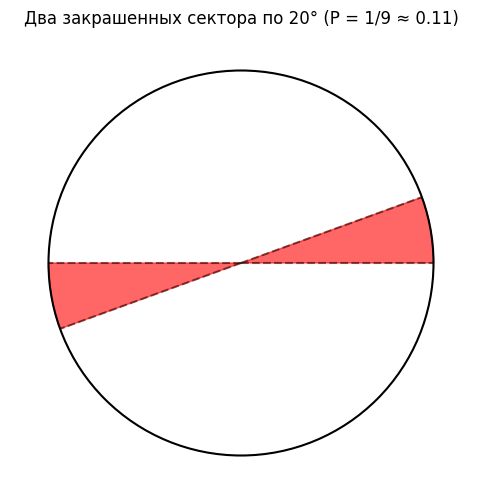

In [5]:
r = 1.0
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect('equal')

theta1 = np.radians(np.linspace(0, 20, 100))
ax.fill(
    np.concatenate([[0], np.cos(theta1) * r, [0]]),
    np.concatenate([[0], np.sin(theta1) * r, [0]]),
    color='red', alpha=0.6
)

theta2 = np.radians(np.linspace(180, 200, 100))
ax.fill(
    np.concatenate([[0], np.cos(theta2) * r, [0]]),
    np.concatenate([[0], np.sin(theta2) * r, [0]]),
    color='red', alpha=0.6
)

for angle in [0, 20, 180, 200]:
    ax.plot([0, np.cos(np.radians(angle))],
            [0, np.sin(np.radians(angle))],
            'k--', alpha=0.5)

ax.add_artist(plt.Circle((0.0, 0.0), r, fill=False, color='black', lw=1.5))

ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.axis('off')
plt.title("Два закрашенных сектора по 20° (P = 1/9 ≈ 0.11)")
plt.show()


### 4

Два парохода должны подойти к одному и тому же причалу независимо друг от друга и равновозможно в течение суток. Определить вероятность того, что одному из них придется ожидать освобождения причала, если время стоянки первого парохода — 1 час, а второго — 2 часа.

Также используем формулу геометрической вероятности. Для наглядности нарисуем график показывающий, пересечения в течении суток

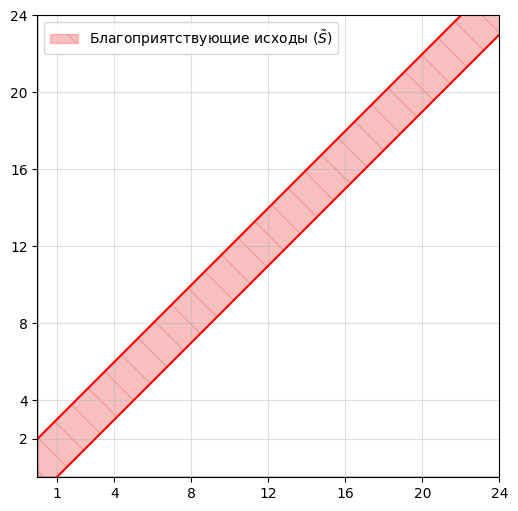

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))

first_time = 1
second_time = 2
total_hours = 24

ax.axvline(0, color="black", lw=1)
ax.axhline(0, color="black", lw=1)
ax.set_xticks(np.array([first_time, 4, 8, 12, 16, 20, 24]))
ax.set_yticks(np.array([second_time, 4, 8, 12, 16, 20, 24]))
ax.set_xlim(0, total_hours)
ax.set_ylim(0, total_hours)

ax.plot([first_time, total_hours], [0, total_hours - first_time], color="red")
ax.plot([0, total_hours - second_time], [second_time, total_hours], color="red")

x_fill = np.linspace(0, total_hours, 500)

y_low = x_fill - first_time
y_high = x_fill + second_time
ax.fill_between(x_fill, y_low, y_high, color='lightcoral', alpha=0.5, label='Благоприятствующие исходы ($\\tilde{S}$)', hatch='\\')

ax.grid(alpha=0.4)
ax.legend()
ax.set_aspect('equal')
plt.show()

Теперь осталось найти площадь фигуры, описвающей множество благоприятствующих исходов и общую площадь:

$S = 24^2 = 576$

$\tilde{S} = S - (\frac{1}{2} \cdot 23^2 + \frac{1}{2} \cdot 22^2) = 576 - 506.5 = 69.5$

$P = \frac{69.5}{576} ≈ 0.12$

### 5

Самолет, по которому ведется стрельба, состоит из трех различных по
уязвимости частей:
* (a) Кабина летчика и двигатель
* (b) Топливные баки
* (c) Планер

Для поражения самолета достаточно либо одного попадания в первую
часть, либо двух попаданий во вторую, либо трех в третью. При попадании в самолет одного снаряда, снаряд с вероятностью $p_1$ попадает в
первую часть, с вероятностью $p_2$ — во вторую, с вероятностью $p_3$ — в
третью. Попавшие снаряды распределяются по частям независимо друг от друга.

Известно, что в самолет попало m снарядов. Найти условную вероятность $P(A \mid m)$ события A – «Самолет поражен» – при m = 1, 2, 3, 4

Для решения задачи будем использовать формулу мультиноминального распределение
$$
\mathsf{P}\left(X_1 = n_1, \dots, X_m = n_m, \right) = \frac{n!}{n_1!\dots n_m!}\mathsf{p}_1^{n_1}\dots \mathsf{p}_m^{n_m},
$$

* $P(A \mid m = 1) = \frac{1!}{1!0!0!} \cdot p_1^1 \cdot p_2^0 \cdot p_3^0 = p_1$
* $P(A \mid m = 2) = \frac{2!}{0!2!0!} \cdot p_1^0 \cdot p_2^2 \cdot p_3^0 +
\frac{2!}{1!1!0!} \cdot p_1^1 \cdot p_2^1 \cdot p_3^0 + \frac{2!}{1!0!1!} \cdot p_1^1 \cdot p_2^0 \cdot p_3^1 + \frac{2!}{2!0!0!} \cdot p_1^2 \cdot p_2^0 \cdot p_3^0 = p_2^2 + 2 ⋅ p_1 \cdot p_2 + 2 ⋅ p_1 \cdot p_3 + p_1^2$
* $P(A \mid m = 3) = 1 - \frac{3!}{0!1!2!} \cdot p_1^0 \cdot p_2^1 \cdot p_3^2= 1 - 3 \cdot p_2 \cdot p_2^2$
* $P(A \mid m = 4) = 1$

## 1.2 Случайный вектор и числовые характеристики

### 1

Пусть

$f_\xi(x, y) = \frac{e^{-2\left|y\right|}}{\pi(1 + x^2)}$

Является ли данная функция плотностью распределения случайного вектора?

Функция $f(x, y)$ является функцией плотности распределения, если выполнены 2 условия:
* $f(x, y) \ge 0, \forall x, y \in \mathbb{R}$
* $\iint_{\mathbb{R}^2} f(x, y)\,dx dy = 1$

Проверяем первое условие
* $e^{-2\left|y\right|} \ge 0, \forall y \in \mathbb{R}$
* $\pi \ge 0$
* $\left(1 + x^2 \right) \ge 0, \forall x \in \mathbb{R}$

Первое условие выполнено

$\iint_{\mathbb{R}^2} \frac{e^{-2|y|}}{\pi(1 + x^2)} \, dx \, dy$

Заметим, что функция разделяется на произведение функций от \(x\) и \(y\):

$f_\xi(x, y) = \underbrace{\frac{1}{\pi(1 + x^2)}}_{g(x)} \cdot \underbrace{e^{-2|y|}}_{h(y)}$

Так как интеграл от произведения разделяющихся функций можно вычислить как произведение интегралов (по теореме Фубини, так как функция неотрицательна):

$\iint_{\mathbb{R}^2} f_\xi(x, y) \, dx \, dy = \left( \int_{-\infty}^{\infty} \frac{1}{\pi(1 + x^2)} \, dx \right) \cdot \left( \int_{-\infty}^{\infty} e^{-2|y|} \, dy \right)$

* $\frac{1}{\pi}\int_{-\infty}^{\infty} \frac{1}{(1 + x^2)} \, dx = \frac{1}{\pi} \left[ \arctan x\right]_{-\infty}^{\infty} = \frac{1}{\pi} \cdot (\frac{\pi}{2} + \frac{\pi}{2}) = 1$
* $\int_{-\infty}^{\infty} e^{-2|y|} \, dy$;
  Функция является чётной $\rightarrow$
  $\int_{-\infty}^{\infty} e^{-2|y|} \, dy = 2 \int_{0}^{\infty} e^{-2|y|} \, dy$; При $\left( y \geq 0 \right)$ имеем $\left( |y| = y \right)$, поэтому
  $\int_{-\infty}^{\infty} e^{-2|y|} \, dy = 2 \int_{0}^{\infty} e^{-2y} \, dy$

* $\int_{0}^{\infty} e^{-2y} \, dy = \left[ -\frac{1}{2} e^{-2y} \right]_{0}^{\infty}
= \lim_{b \to \infty} \left( -\frac{1}{2} e^{-2b} \right) - \left( -\frac{1}{2} e^{0} \right) =
\int_{0}^{\infty} e^{-2y} \, dy = 0 - \left( -\frac{1}{2} \right) = \frac{1}{2}
$
* $\int_{-\infty}^{\infty} e^{-2|y|} \, dy = 2 \cdot \frac{1}{2} = 1$

Так как оба условия выполнены, то функция

$f_\xi(x, y) = \frac{e^{-2\left|y\right|}}{\pi(1 + x^2)}$

Является функцией плотности случайного вектора

### 2

Совместное распределение случайных величин $\xi \, и \, \eta$

Совместное распределение задано таблицей:

| $\xi \backslash \eta$ | -1            | 0              | 1              |
|-----------------------|---------------|----------------|----------------|
| -1                    | $\frac{1}{8}$ | $\frac{1}{12}$ | $\frac{7}{24}$ |
| 1                     | $\frac{1}{3}$ | $\frac{1}{6}$  | $0$            |


* Найти маргинальные распределения $\xi \, и \, \eta$
* Вычислить:
  - математическое ожидание,
  - ковариационную матрицу,
  - корреляционную матрицу
  
  вектора $\xi, \eta$

* Исследовать $\xi \, и \, \eta$ на:
  - независимость,
  - некоррелированность


Маргинальное распределение для $\xi$
* $P(\xi = -1) = \sum_j P\left(\xi = -1, \eta = \eta_j\right) = \frac{1}{8} + \frac{1}{12} + \frac{7}{24} = \frac{1}{2}$
* $P(\xi = 1) = \sum_j P\left(\xi = 1, \eta = \eta_j\right) = \frac{1}{3} + \frac{1}{6} = \frac{1}{2}$

Проверяем условие нормировки:
$\frac{1}{2} + \frac{1}{2} = 1$

Маргинальное распределение для $\eta$
* $P(\eta = -1) = \sum_i P\left(\eta = -1, \xi = \xi_i\right) = \frac{1}{8} + \frac{1}{3} = \frac{11}{24}$
* $P(\eta = 0) = \sum_i P\left(\eta = 0, \xi = \xi_i\right) = \frac{1}{12} + \frac{1}{6} = \frac{1}{4}$
* $P(\eta = 1) = \sum_i P\left(\eta = 1, \xi = \xi_i\right) = \frac{7}{24}$

Проверяем условие нормировки:
$\frac{11}{24} + \frac{1}{4} + \frac{1}{24} = 1$

Распределение $\xi$

| $\xi$   | $P(\xi)$      |
|---------|---------------|
| $-1$    | $\frac{1}{2}$ |
| $1$     | $\frac{1}{2}$ |

Распределение $\eta$

| $\eta$  | $P(\eta)$      |
|---------|----------------|
| $-1$    | $\frac{11}{24}$|
| $0$     | $\frac{1}{4}$  |
| $1$     | $\frac{7}{24}$ |

$M(\xi) = -1 \cdot \frac{1}{2} + 1 \cdot \frac{1}{2} = 0$

$M(\eta) = -1 \cdot \frac{11}{24} + 0 \cdot \frac{1}{4} + 1 \cdot \frac{7}{24} = -\frac{1}{6}$

$M^2(\xi) = 1 \cdot \frac{1}{2} + 1 \cdot \frac{1}{2} = 1$

$M^2(\eta) = 1 \cdot \frac{11}{24} + 0 \cdot \frac{1}{4} + 1 \cdot \frac{7}{24} = \frac{3}{4}$

$D(\xi) = 1 - 0^2 = 1$

$D(\eta) = \frac{3}{4} - -\frac{1}{6}^2 = \frac{3}{4} - \frac{1}{36} = \frac{26}{36} = \frac{13}{18}$

$\sigma(\xi) = 1$

$\sigma(\eta) = \sqrt\frac{13}{18}$

$M(\xi, \eta) = \frac{1}{8} -\frac{7}{24} - \frac{1}{3} = -\frac{1}{2}$

$Cov(\xi, \eta) = M(\xi, \eta) - M(\xi) \cdot M(\eta) = -\frac{1}{2} - 0 \cdot -\frac{1}{6} = -\frac{1}{2}$

|        | $\xi$  | $\eta$         |
|--------|--------|----------------|
| $\xi$  | 1      | -0.5           |
| $\eta$ | -0.5   | $\frac{13}{18}$|

$Corr(\xi, \eta) = \frac{Cov(\xi, \eta)}{\sigma(\xi) \cdot \sigma(\eta)} = \frac{-0.5}{1 \cdot \sqrt\frac{13}{18}} ≈ -0.59$

|        | $\xi$   | $\eta$ |
|--------|---------|--------|
| $\xi$  | 1       | -0.59  |
| $\eta$ | -0.59   | 1      |

Так как коэффициент ковариации и корреляции $\neq 0$, то величины коррелированы и если смотреть по значение по коррелированность средняя

Чтобы выполнялось условие независимости 2-х случайных величин, должно соблюдаться следующее равенство
$P(X=x, Y=y) = P(X=x) \cdot P(Y=y)$ и если данное равенство не соблюдается в одной точке, то величины зависимые

В нашем случае если мы возьмем $P(\xi=1, \eta=1) = 0$ в то время как их произведение отлично от 0

В итоге наши СВ зависимые и умеренно коррелируемые

### 3

Пусть имеются два одинаковых тетраэдра с числами 1,2,3,4 на гранях.  
Подкидываем оба и смотрим на выпавшие числа $\xi_1 и \, \xi_2$.  
Зададим следующие случайные величины:

$\varphi_1 = \xi_1 + \xi_2$

$\varphi_2 =
\begin{cases}
1, & (\xi_1 \vdots \xi_2)\ \cup\ (\xi_2 \vdots \xi_1), \\
0, & \text{else}
\end{cases}
$


* (a) Составить таблицу совместного распределения $\xi\,  и \, \eta$

* (b) Найти маргинальные распределения $\xi\,  и \, \eta$

* (c) Вычислить математическое ожидание, ковариационную и корреляционную матрицы вектора $(\xi,\eta$)

* (d) Исследовать $\xi\,  и \, \eta$ на независимость и некоррелированность


In [14]:
pairs = list(product([1, 2, 3, 4], repeat=2))
first_tetrahedron, second_tetrahedron = [], []
for first, second in pairs:
  first_tetrahedron.append(first)
  second_tetrahedron.append(second)
first_tetrahedron = np.array(first_tetrahedron)
second_tetrahedron = np.array(second_tetrahedron)
phi_1 = first_tetrahedron + second_tetrahedron
phi_2 = ((first_tetrahedron % second_tetrahedron == 0) | (second_tetrahedron % first_tetrahedron == 0)).astype(int)
df = pd.DataFrame({
    "iteration": np.arange(1, 17),
    "first_tetrahedron": first_tetrahedron,
    "second_tetrahedron": second_tetrahedron,
    "phi_1": phi_1,
    "phi_2": phi_2,
})
df = df.set_index("iteration")
display(df)

,first_tetrahedron,second_tetrahedron,phi_1,phi_2
iteration,,,,
1,1,1,2,1
2,1,2,3,1
3,1,3,4,1
4,1,4,5,1
5,2,1,3,1
6,2,2,4,1
7,2,3,5,0
8,2,4,6,1
9,3,1,4,1


Составим таблицу

| $\varphi_2 \backslash \varphi_1$ | $2$             | $3$             | $4$             | $5$             | $6$             | $7$             | $8$             |
|----------------------------------|------------------|------------------|------------------|------------------|------------------|------------------|------------------|
| $0$                              | $0$              | $0$              | $0$              | $\frac{2}{16}$   | $0$              | $\frac{2}{16}$   | $0$              |
| $1$                              | $\frac{1}{16}$   | $\frac{2}{16}$   | $\frac{3}{16}$   | $\frac{2}{16}$   | $\frac{3}{16}$   | $0$              | $\frac{1}{16}$   |


Маргинальное распределение для $\varphi_1$
* $P(\varphi_1 = 2) = \sum_j P\left(\varphi_1 = 2, \varphi_2 = (\varphi_2) _j\right) = 0 + \frac{1}{16} = \frac{1}{16}$
* $P(\varphi_1 = 3) = \sum_j P\left(\varphi_1 = 2, \varphi_2 = (\varphi_2) _j\right) = 0 + \frac{2}{16} = \frac{1}{8}$
* $P(\varphi_1 = 4) = \sum_j P\left(\varphi_1 = 2, \varphi_2 = (\varphi_2) _j\right) = 0 + \frac{3}{16} = \frac{3}{16}$
* $P(\varphi_1 = 5) = \sum_j P\left(\varphi_1 = 2, \varphi_2 = (\varphi_2) _j\right) = \frac{2}{16} + \frac{2}{16} = \frac{1}{4}$
* $P(\varphi_1 = 6) = \sum_j P\left(\varphi_1 = 2, \varphi_2 = (\varphi_2) _j\right) = 0 + \frac{3}{16} = \frac{3}{16}$
* $P(\varphi_1 = 7) = \sum_j P\left(\varphi_1 = 2, \varphi_2 = (\varphi_2) _j\right) = 0 + \frac{2}{16} = \frac{1}{8}$
* $P(\varphi_1 = 8) = \sum_j P\left(\varphi_1 = 2, \varphi_2 = (\varphi_2) _j\right) = 0 + \frac{1}{16} = \frac{1}{16}$

Проверяем условие нормировки:
$\frac{1}{16} + \frac{1}{8} + \frac{3}{16} + \frac{1}{4} + \frac{3}{16} + \frac{1}{8} +  \frac{1}{16} = 1$

Маргинальное распределение для $\varphi_2$
* $P(\varphi_2 = 0) = \sum_i P\left(\varphi_2 = 0, \varphi_1 = (\varphi_1)_i\right) = 0 + 0 + 0 + \frac{1}{8} + 0 + \frac{1}{8} + 0 = \frac{1}{4}$
* $P(\varphi_2 = 1) = \sum_i P\left(\varphi_2 = 0, \varphi_1 = (\varphi_1)_i\right) = \frac{1}{16} + \frac{2}{16} + \frac{3}{16} + \frac{2}{16} + \frac{3}{16} + 0 +\frac{1}{16} = \frac{3}{4}$

Проверяем условие нормировки:
$\frac{1}{4} + \frac{3}{4} + \frac{1}{24} = 1$

| $\varphi_1$ |   2   |   3   |   4   |   5   |   6   |   7   |   8   |
|-------------|-------|-------|-------|-------|-------|-------|-------|
| $P(\varphi_1)$ | $\frac{1}{16}$ | $\frac{1}{8}$ | $\frac{3}{16}$ | $\frac{1}{4}$ | $\frac{3}{16}$ | $\frac{1}{8}$ | $\frac{1}{16}$ |

| $\varphi_2$        |   0   |   1   |
|--------------------|-------|-------|
| $P(\varphi_2)$     | $\frac{1}{4}$ | $\frac{3}{4}$ |


$M(\varphi_1) = 2 \cdot \frac{1}{16} + 3 \cdot \frac{1}{8} + 4 \cdot \frac{3}{16} + 5 \cdot \frac{1}{4} + 6 \cdot \frac{3}{16} + 7 \cdot \frac{1}{8} + 8 \cdot \frac{1}{16} = 5$

$M(\varphi_2) = 0 \cdot \frac{1}{4} + 1 \cdot \frac{3}{4} = \frac{3}{4}$

$M^2(\varphi_1) = 4 \cdot \frac{1}{16} + 9 \cdot \frac{1}{8} + 16 \cdot \frac{3}{16} + 25 \cdot \frac{1}{4} + 36 \cdot \frac{3}{16} + 49 \cdot \frac{1}{8} + 64 \cdot \frac{1}{16} = \frac{55}{2}$

$M^2(\varphi_2) = 0 \cdot \frac{1}{4} + 1 \cdot \frac{3}{4} = \frac{3}{4}$

$D(\varphi_1) = \frac{55}{2} - 5^2 = \frac{5}{2}$

$D(\varphi_2) = \frac{3}{4} - \frac{3}{4}^2 = \frac{3}{16}$

$\sigma(\varphi_1) = \sqrt\frac{5}{2}$

$\sigma(\varphi_2) = \sqrt\frac{3}{16}$

$M(\varphi_1, \varphi_2) = \frac{1}{8} + \frac{6}{16} + \frac{3}{4} + \frac{10}{16} + \frac{18}{16} + \frac{1}{2}= \frac{7}{2}$

$Cov(\varphi_1, \varphi_2) = M(\varphi_1, \varphi_2) - M(\varphi_1) \cdot M(\varphi_2) = \frac{7}{2} - 5 \cdot \frac{3}{4} = -\frac{1}{4}$

|        | $\varphi_1$  | $\varphi_2$         |
|--------|--------|----------------|
| $\varphi_1$  | $\frac{5}{2}$      | -0.25           |
| $\varphi_2$ | -0.25   | $\frac{3}{16}$|

$Corr(\varphi_1, \varphi_2) = \frac{Cov(\varphi_1, \varphi_2)}{\sigma(\varphi_1) \cdot \sigma(\varphi_2)} = \frac{-0.25}{\sqrt\frac{5}{2} \cdot \sqrt\frac{3}{16}} ≈ -0.37$

|        | $\varphi_1$   | $\varphi_2$ |
|--------|---------|--------|
| $\varphi_1$  | 1       | -0.37  |
| $\varphi_2$ | -0.37   | 1      |

Так как ковариация и корреляция отличны от нуля
$Cov(\varphi_1,\varphi_2) = -\frac14 \neq 0$

$\rho_{\varphi_1,\varphi_2} \approx -0.37 \neq 0$

То случайные величины $\varphi_1$ и $\varphi_2$ коррелированы, причём связь
умеренная и отрицательная

Чтобы выполнялось условие независимости двух случайных величин, должно выполняться равенство

$P(X=x,\, Y=y) = P(X=x)\cdot P(Y=y)$

для всех возможных значений $x$ и $y$. Если это равенство нарушается хотя бы в одной точке, величины считаются зависимыми

В нашем случае, например:

$P(\varphi_1 = 7,\; \varphi_2 = 1) = 0$

тогда как произведение соответствующих маргинальных вероятностей равно

$P(\varphi_1 = 7)\cdot P(\varphi_2 = 1) = \frac{1}{8}\cdot \frac{3}{4} = \frac{3}{32} > 0$

Так как равенство
$P(\varphi_1 = 7,\, \varphi_2 = 1) = P(\varphi_1 = 7)\cdot P(\varphi_2 = 1)$
не выполняется, то величины $\varphi_1$ и $\varphi_2$ являются:

   - зависимыми,
   - умеренно отрицательно коррелированными


### 4

Пусть случайная величина $\xi \sim U[-\pi, \pi] \, и \,
\eta_1 = \cos \xi \, , \,  \eta_2 = \sin \xi.
$

Требуется:

(a) Вычислить:
- математическое ожидание,
- ковариационную матрицу,
- корреляционную матрицу

вектора $(\xi, \eta)$.

(b) Исследовать $\xi$ и $\eta$  на независимость и некоррелированность.


Мы работаем с абсолютно непрерывными распределениями, то вспомним формулы для работы

$M(X) = \int_{-\infty}^{\infty} x \cdot f(x) \, dx$

$M^2(X) = \int_{-\infty}^{\infty} x^2 \cdot f(x) \, dx$

Запишем функцию плотности $\xi$

$
f(x) =
\begin{cases}
\frac{1}{2\pi}, & x \in [-\pi;\pi], \\
0, & else
\end{cases}
$

$\eta = (\eta_1, \eta_2) = (\cos \xi \, , \sin \xi)$

$M(\xi) = \frac{1}{2\pi}\int_{-\pi}^{\pi} x \, dx = \frac{1}{2\pi} \cdot \frac{x^2}{2}\Big|_{-\pi}^{\pi} = \frac{1}{2\pi} \cdot 0 = 0$

$M(\eta_1) = \frac{1}{2\pi}\int_{-\pi}^{\pi} cos x \, dx = \frac{1}{2\pi} \cdot sin x\big|_{-\pi}^{\pi} = 0$

$M(\eta_2) = \frac{1}{2\pi}\int_{-\pi}^{\pi} sin x \, dx = \frac{1}{2\pi} \cdot -cos x\big|_{-\pi}^{\pi} = 0$

$M^2(\xi) = \frac{1}{2\pi}\int_{-\pi}^{\pi} x^2 \, dx = \frac{1}{2\pi} \cdot \frac{x^3}{3}\Big|_{-\pi}^{\pi} = \frac{1}{2\pi} \cdot \frac{2\pi^3}{3} = \frac{\pi^2}{3}$

$M^2(\eta_1) = \frac{1}{2\pi}\int_{-\pi}^{\pi} cos^2 x \, dx = \frac{1}{4\pi} \int_{-\pi}^{\pi} 1 + \, \cos2x = \frac{1}{4\pi} \left(\int_{-\pi}^{\pi} 1 \, dx + \int_{-\pi}^{\pi} \cos 2x\, dx \right) = \frac{1}{2}$

$M^2(\eta_2) = \frac{1}{2\pi}\int_{-\pi}^{\pi} sin^2 x \, dx = \frac{1}{4\pi} \int_{-\pi}^{\pi} 1 - \, \cos2x = \frac{1}{4\pi} \left(\int_{-\pi}^{\pi} 1 \, dx - \int_{-\pi}^{\pi} \cos 2x\, dx \right) = \frac{1}{2}$

$D(\xi) = \frac{\pi^2}{3}$

$D(\eta_1) = \frac{1}{2}$

$D(\eta_2) = \frac{1}{2}$

$Cov(\xi, \eta_1) = M(\xi\eta_1) - M(\xi) \cdot M(\eta_1)$

$Cov(\xi, \eta_2) = M(\xi\eta_2) - M(\xi) \cdot M(\eta_2)$

$Cov(\eta_1, \eta_1) = M(\eta_1\eta_2) - M(\eta_1) \cdot M(\eta_1)$

Так как у нас все математические ожидания равны 0, то формулы упрощаются

$Cov(\xi, \eta_1) = M(\xi\eta_1)$

$Cov(\xi, \eta_2) = M(\xi\eta_2)$

$Cov(\eta_1, \eta_1) = M(\eta_1\eta_1)$



У нас величины не имеют самостоятельной совместной плотности —
они заданы через одну случайную величину:

$
\xi \sim U[-\pi,\pi], \qquad
\eta_1 = \cos \xi,\qquad
\eta_2 = \sin \xi,
$

а плотность $\xi$:

$
f_\xi(x) = \frac{1}{2\pi}, \quad x\in[-\pi,\pi].
$

Поэтому совместное ожидание любой функции $(\xi,\eta_1,\eta_2)$
вычисляется не двойным, а одномерным интегралом:

$
M(g(\xi,\eta_1,\eta_2))
= \frac{1}{2\pi}\int_{-\pi}^{\pi} g(x,\cos x, \sin x)\, dx.
$


In [22]:
left_bound, right_bound = -pi, pi
x = Symbol('x')

expr_1 = (x * cos(x)) / (2 * pi) # M[ξcosξ]
expr_2 = (x * sin(x)) / (2 * pi) # M[ξsinξ]
expr_3 = (cos(x) * sin(x)) # M[cosξsinξ]

cov_1 = integrate(expr_1, (x, left_bound, right_bound))
cov_2 = integrate(expr_2, (x, left_bound, right_bound))
cov_3 = integrate(expr_3, (x, left_bound, right_bound))

display(cov_1)
display(cov_2)
display(cov_3)

0

1

0

* $Cov(\xi, \eta_1) = M(\xi\eta_1) = 0$

* $Cov(\xi, \eta_2) = M(\xi\eta_2) = 1$

* $Cov(\eta_1, \eta_1) = M(\eta_1\eta_1) = 0$

Ковариационная матрица:

|        | $\xi$  | $\eta_1$         | $\eta_2$|
|--------|--------|----------------|-|
| $\xi$  | $\frac{\pi^2}{3}$      | 0          |1|
| $\eta_1$ | 0   | $\frac{1}{2}$|0|
| $\eta_2$|1|0|$\frac{1}{2}$|

$Corr(\xi, \eta_1) = \frac{Cov(\xi, \eta_1)}{\sigma(\xi)\sigma(\eta_1)} = 0$

$Corr(\xi, \eta_2) = \frac{Cov(\xi, \eta_2)}{\sigma(\xi)\sigma(\eta_2)} \approx 0$

$Corr(\eta_1, \eta_1) = \frac{Cov(\eta_1, \eta_2)}{\sigma(\eta_1)\sigma(\eta_2)} = 0$

Корреляционная матрица:

|        | $\xi$  | $\eta_1$         | $\eta_2$|
|--------|--------|----------------|-|
| $\xi$  | 1      | 0          |$\frac{\sqrt{6}}{\pi}$|
| $\eta_1$ | 0   | 1|0|
| $\eta_2$|$\frac{\sqrt{6}}{\pi}$|0|1|

 $\xi \, и \,  \eta_1 = \cos \xi$  
   - $Cov(\xi, \eta_1) = 0$ → некоррелированы  
   - Но $\eta_1 = \cos \xi$ — функция от $\xi $ → зависимы  
   Некоррелированы, но зависимы

$\xi\, и \, \eta_2 = \sin \xi$  
   - $Cov(\xi, \eta_2) = 1$ → коррелированы  
   - Но $\eta_1 = \cos \xi$ — функция от $\xi $ → зависимы   
   Коррелированы и зависимы

$\eta_1 = \cos \xi \, и \, \eta_2 = \sin \xi$  
   - $Cov(\eta_1, \eta_2) = 0$ → некоррелированы  
   - Но $\eta_1^2 + \eta_2^2 = \cos^2 \xi + \sin^2 \xi = 1$ — жёсткая функциональная связь → зависимы  
   Некоррелированы, но зависимы

### 5

Найти плотность распределения суммы двух независимых случайных величин
$\xi$ и $\eta$, если $\xi \sim \mathrm{Exp}_2, \eta \sim U_{0,1}$


$
f_\xi(x) =
\begin{cases}
2 \cdot e^{-2x}, & x \ge 0 \\
0, & x \lt 0
\end{cases}
$

$
f_\eta(x) =
\begin{cases}
1, & x \in [0, 1] \\
0, & x \notin [0, 1]
\end{cases}
$

$f_{\xi + \eta}(x) = \int f_{\xi}(u) \int f_{\eta}(x - u) \, du$

Подынтергальное выражение:

$\int f_{\xi}(u) \int f_{\eta}(x - u) > 0$

Только если:

* $u \ge 0$
* $x - 1 \le u \le x$

Получаем 2 случая:
![image](https://raw.githubusercontent.com/CactusDataMafia/Yadro_AI_schoo_sem_1_ML/main/photo_2025-11-19_15-34-38.jpg)


In [25]:
x, u = symbols('x u', real=True)

f_xi = 2 * exp(-2*u)
f_eta = 1

expr_1 = integrate(f_xi * f_eta, (u, 0, x))
expr_2 = integrate(f_xi * f_eta, (u, x - 1, x))

display(expr_1)
display(expr_2)

1 - exp(-2*x)

exp(2 - 2*x) - exp(-2*x)

$
f_{\xi + \eta} = \begin{cases}
0, & x \lt 0 \\
1 - e^{-2x}, & 0 \le x \le 1 \\
e^{2-2x} - e^{-2x}, & x \gt 1
\end{cases}
$